In [2]:
!pip install yfinance
!pip install matplotlib
!pip install pandas 
!pip install numpy
!pip install scikit-learn


     -------------------------------------- 108.5/108.5 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 10.1 MB/s eta 0:00:00
     ------------------------------------- 507.9/507.9 kB 10.8 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 10.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
     -------------------------------------- 346.8/346.8 kB 7.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=4886d967ceae46b75121e9cce3c46b


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.0/8.0 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 219.8/219.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 107.7/107.7 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


     ---------------------------------------- 11.1/11.1 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 43.9/43.9 MB 9.0 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
!pip install keras


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
!pip install --upgrade pip

     ---------------------------------------- 1.8/1.8 MB 7.3 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
!pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
start = '2012-1-1'
end   = '2022-12-21'
stock = 'GOOG'

data  = yf.download( stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:
data.reset_index(inplace=True)

In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534698,91.421511,89.687743,90.873478,48485500


In [10]:
ma_100_days = data.Close.rolling(100).mean()

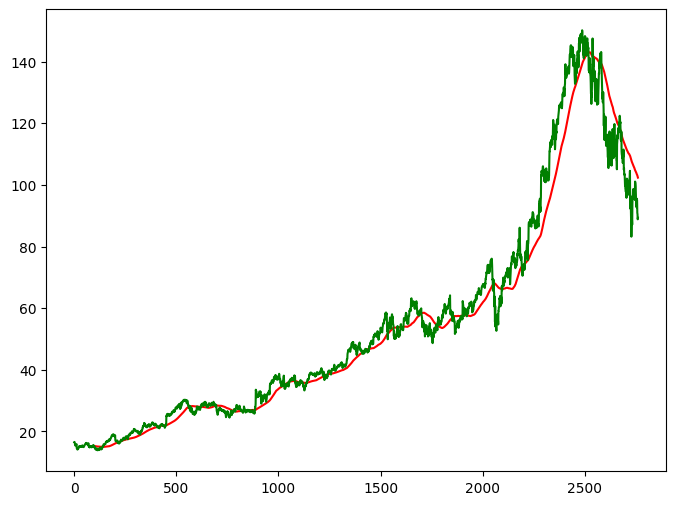

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

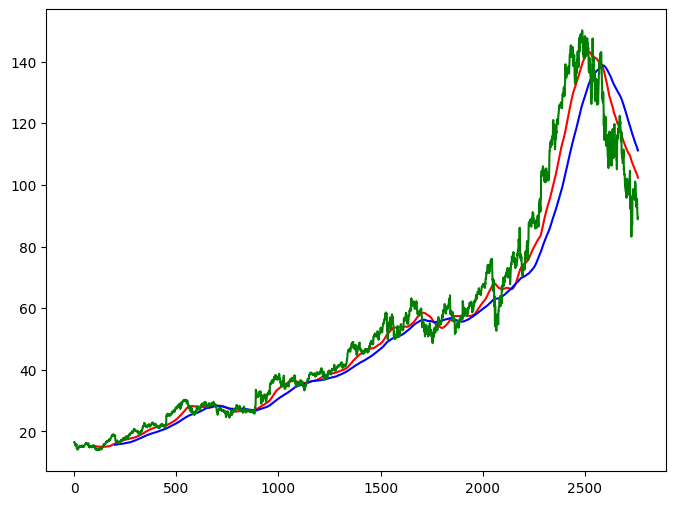

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [14]:
data.dropna(inplace=True)

In [15]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test  = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [16]:
data_train.shape[0]

2208

In [17]:
data_test.shape[0]

553

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_scale = scaler.fit_transform(data_train)

In [20]:
x =[]
y =[]

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [22]:
x, y = np.array(x), np.array(y)

In [27]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 0.0580
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0067
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0054
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0057
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0050
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0046
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0050
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0046
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0043
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0034
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0033
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0031
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/st

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [33]:
pas_100_days = data_train.tail(100)

In [34]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [36]:
data_test_scale = scaler.fit_transform(data_test)

In [37]:
x =[]
y =[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [38]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step 


In [42]:
scale =1/scaler.scale_

In [44]:
y_predict = y_predict*scale

In [45]:
y = y*scale

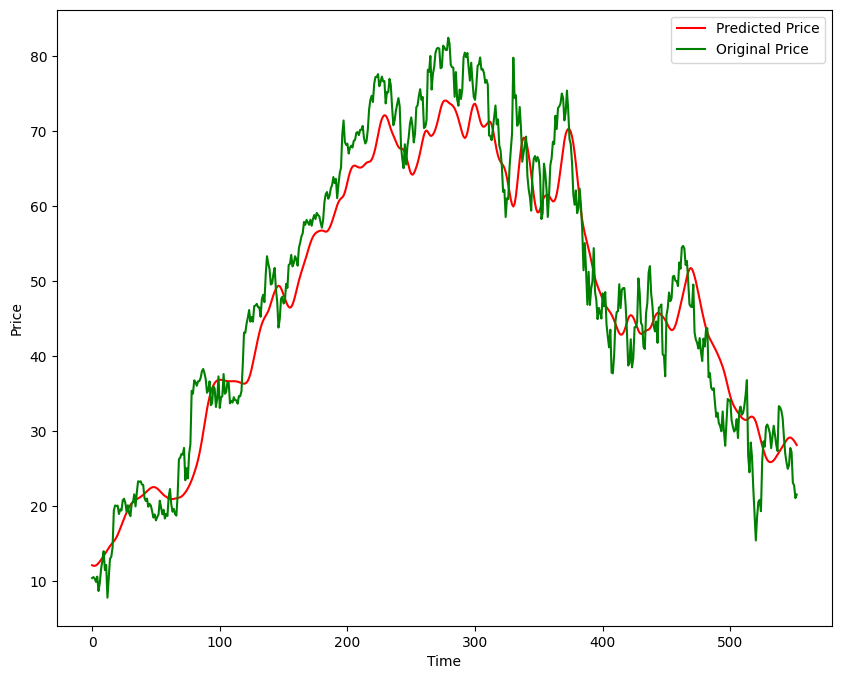

In [46]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
model.save('Stock Predictions Model.keras')